In [46]:
from google.colab import drive
drive.mount('/content/drive')

# go into your project folder in Drive
%cd /content/drive/MyDrive/brats7d

# add project folder to Python path
import sys, os
sys.path.append(os.getcwd())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/brats7d


In [ ]:
!pip install nibabel matplotlib torch h5py

In [48]:
import importlib
import src.dataset
importlib.reload(src.dataset)

from src.dataset import BraTSDataset


Repo path added: /content/brats7d
Dataset path: data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData
Files inside BraTS20_Training_001: ['BraTS20_Training_001_t1.nii', 'BraTS20_Training_001_t2.nii', 'BraTS20_Training_001_flair.nii', 'BraTS20_Training_001_t1ce.nii', 'BraTS20_Training_001_seg.nii']
Total subjects found: 369
Image shape: (4, 240, 240, 155)
Segmentation shape: (240, 240, 155)


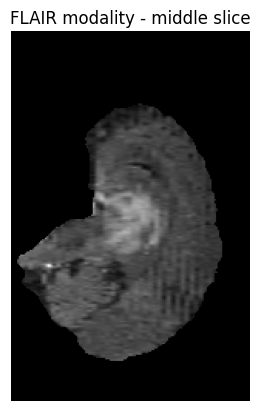

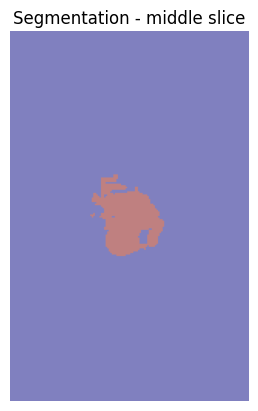

In [49]:
import sys
import os
import torch
import nibabel as nib
import matplotlib.pyplot as plt

# Add repo root to sys.path (where src/ lives)
repo_path = "/content/brats7d"
if repo_path not in sys.path:
    sys.path.append(repo_path)
print("Repo path added:", repo_path)

from src.dataset import BraTSDataset

# Dataset path
data_path = os.path.join("data", "BraTS2020_TrainingData", "MICCAI_BraTS2020_TrainingData")
print("Dataset path:", data_path)

# Optional: inspect a specific subject folder
subject_id = "BraTS20_Training_001"
subject_folder = os.path.join(data_path, subject_id)

if os.path.exists(subject_folder):
    files = os.listdir(subject_folder)
    print(f"Files inside {subject_id}:", files)
else:
    print(f"Subject folder {subject_id} does not exist!")

# Initialize dataset
ds = BraTSDataset(data_path)
print(f"Total subjects found: {len(ds)}")

# Load first subject
img, seg = ds[0]  # img shape: (4, D, H, W), seg shape: (D, H, W)
print("Image shape:", img.shape)
print("Segmentation shape:", seg.shape)

# Visualize middle slice from FLAIR modality
slice_idx = img.shape[1] // 2  # middle slice along depth
plt.imshow(img[0, slice_idx, :, :], cmap="gray")
plt.title("FLAIR modality - middle slice")
plt.axis('off')
plt.show()

# Optional: visualize corresponding segmentation slice
plt.imshow(seg[slice_idx, :, :], cmap="jet", alpha=0.5)
plt.title("Segmentation - middle slice")
plt.axis('off')
plt.show()


In [52]:
import matplotlib.pyplot as plt
import numpy as np

def show_slices(slices, titles=None):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        if titles:
            axes[i].set_title(titles[i])
    plt.show()

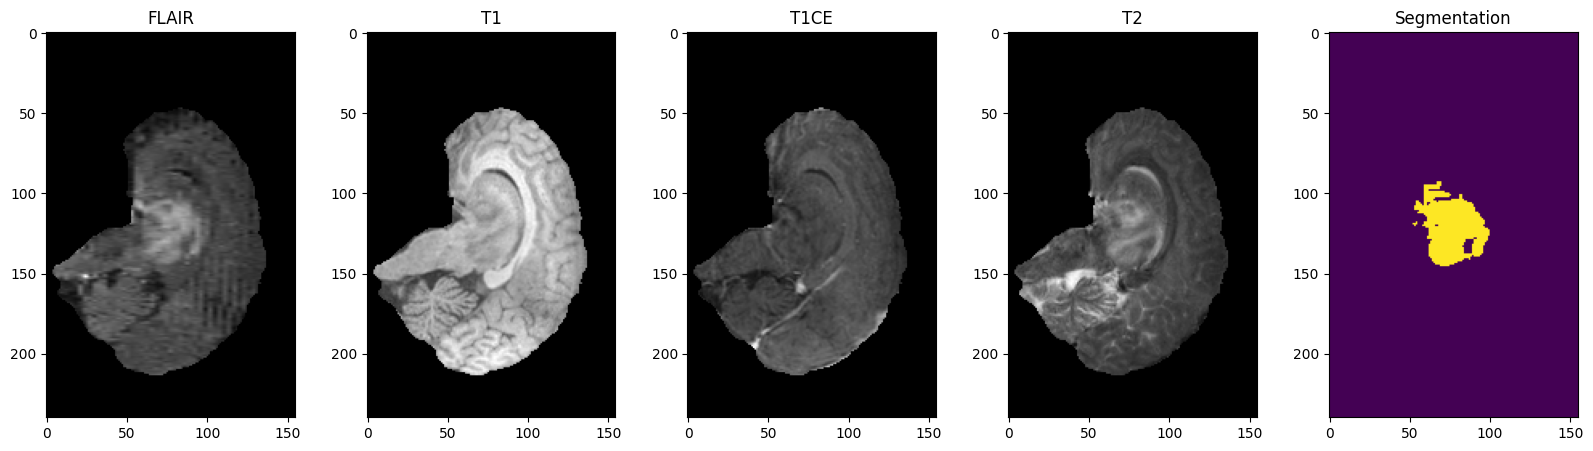

In [53]:
# show middle slice of each modality + segmentation
modalities = ["FLAIR", "T1", "T1CE", "T2"]
mid_slice = img.shape[1] // 2  # middle slice along depth

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(4):
    axes[i].imshow(img[i, mid_slice, :, :], cmap="gray")
    axes[i].set_title(modalities[i])

# segmentation
axes[4].imshow(seg[mid_slice, :, :])
axes[4].set_title("Segmentation")
plt.show()
